<h1>K-means Clustering</h1>
<p>In this this exercise, you will implement the K-means algorithm and use it
for image compression. You will first start on an example 2D dataset that
will help you gain an intuition of how the K-means algorithm works. After
that, you wil use the K-means algorithm for image compression by reducing
the number of colors that occur in an image to only those that are most
common in that image.</p>

In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

<h2>1. Implementing K-means</h2>
<p>The K-means algorithm is a method to automatically cluster similar data
examples together. Concretely, you are given a training set {x (1) , ..., x (m) }
(where x (i) ∈ R n ), and want to group the data into a few cohesive “clusters”.
The intuition behind K-means is an iterative procedure that starts by guess-
ing the initial centroids, and then refines this guess by repeatedly assigning
examples to their closest centroids and then recomputing the centroids based
on the assignments.<br>
The K-means algorithm is as follows:</p>
<code>
% Initialize centroids
centroids = kMeansInitCentroids(X, K);
for iter = 1:iterations
% Cluster assignment step: Assign each data point to the
% closest centroid. idx(i) corresponds to cˆ(i), the index
% of the centroid assigned to example i
idx = findClosestCentroids(X, centroids);
% Move centroid step: Compute means based on centroid
% assignments
centroids = computeMeans(X, idx, K);
end
</code>
<p>
The inner-loop of the algorithm repeatedly carries out two steps: (i) As-
signing each training example x (i) to its closest centroid, and (ii) Recomput-
ing the mean of each centroid using the points assigned to it. The K-means
algorithm will always converge to some final set of means for the centroids.
Note that the converged solution may not always be ideal and depends on the
initial setting of the centroids. Therefore, in practice the K-means algorithm
is usually run a few times with different random initializations. One way to
choose between these different solutions from different random initializations
is to choose the one with the lowest cost function value (distortion).
You will implement the two phases of the K-means algorithm separately
in the next sections.</p>

In [3]:
data=loadmat('ex7data2.mat')
X=data['X']
initial_centroids=np.array([[3,3],[6,2],[8,5]])     #gi

<h3>1.1 Finding closest centroids</h3>
<p>
In the “cluster assignment” phase of the K-means algorithm, the algorithm
assigns every training example x (i) to its closest centroid, given the current
positions of centroids. Specifically, for every example i we set
</p>
<em>
\begin{align}
c^{(i)}:= j\quad\text{ that minimizes }\quad|| x^{(i)} − μ_j ||^{2} ,
\end{align} 
</em>
<p>
where c (i) is the index of the centroid that is closest to x (i) , and μ j is the
position (value) of the j’th centroid. Note that c (i) corresponds to idx(i) in
the starter code.</p>
<p>
Your task is to complete the code in findClosestCentroids.m. This
function takes the data matrix X and the locations of all centroids inside
centroids and should output a one-dimensional array idx that holds the
index (a value in {1, ..., K}, where K is total number of centroids) of the
closest centroid to every training example.</p>
<p>
You can implement this using a loop over every training example and
every centroid.</p>

In [4]:
def find_closest_centroid(X,centroids):
    m=X.shape[0]
    k=centroids.shape[0]
    idx=np.zeros(m)
    for i in range(m):
        min_dist=1000000
        for j in range(k):
            dist=np.sum((X[i]-centroids[j])**2.0)
            if dist<min_dist:
                min_dist=dist
                idx[i]=j
    return idx
        

<h3>1.2 Computing centroid means</h3>
<p>
Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that were
assigned to it. Specifically, for every centroid k we set</p>
<em>
\begin{equation*}
    μ_k = \frac{1}{|C_k|} \sum_{i∈C_k} x^{(i)}
\end{equation*}
</em>
where C k is the set of examples that are assigned to centroid k. Concretely,
if two examples say x (3) and x (5) are assigned to centroid k = 2, then you
should update μ 2 = 2 1 (x (3) + x (5) ).
You should now complete the code in computeCentroids.m. You can
implement this function using a loop over the centroids. You can also use a
loop over the examples; but if you can use a vectorized implementation that
does not use such a loop, your code may run faster.

In [5]:
def compute_centroids(X,idx,k):
    m,n=X.shape
    centroids=np.zeros([k,n])
    for i in range(k):
        indices=np.where(idx==i)
        centroids[i]=np.sum(X[[indices]],axis=1)/len(indices[0])
    
    return centroids

In [6]:
def runKmeans(X,initial_centroids,max_iters):
    m=X.shape[0]
    k=initial_centroids.shape[0]
    idx=np.zeros(m)
    centroids=initial_centroids
    for i in range(max_iters):
        idx=find_closest_centroid(X,centroids)
        centroids=compute_centroids(X,idx,k)
    return idx,centroids

In [7]:
idx,centroids=runKmeans(X,initial_centroids,10)

/home/beast/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [8]:
cluster1=X[np.where(idx==0)[0]]
cluster2=X[np.where(idx==1)[0]]
cluster3=X[np.where(idx==2)[0]]

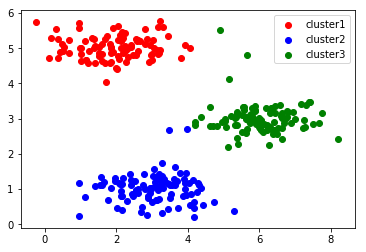

In [9]:
plt.scatter(cluster1[:,0],cluster1[:,1],color='r',label='cluster1')
plt.scatter(cluster2[:,0],cluster2[:,1],color='b',label='cluster2')
plt.scatter(cluster3[:,0],cluster3[:,1],color='g',label='cluster3')
plt.legend()
plt.show()

In [10]:
def init_centroids(X,k):
    m,n=X.shape
    idx=np.random.randint(0,m,k)
    centroids=X[[idx]]
    return centroids

In [11]:
init_centroids(X,3)

/home/beast/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


array([[1.67838038, 5.26903822],
       [2.87961084, 0.75413741],
       [3.56478625, 1.11764714]])

In [12]:
image=loadmat("bird_small.mat")

In [13]:
image

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ...,
         [ 65,  43,  39

In [14]:
A=image['A']
A.shape

(128, 128, 3)

In [19]:
A=A/255.0
X=np.reshape(A,(A.shape[0]*A.shape[1],A.shape[2]))
k=16
initial_centroids=init_centroids(X,k)
idx,centroids=runKmeans(X,initial_centroids,20)
X_compressed=centroids[list(map(int,idx))]     #mapping to centroid values
X_compressed=np.reshape(X_compressed,(A.shape[0],A.shape[1],A.shape[2]))

/home/beast/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/home/beast/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


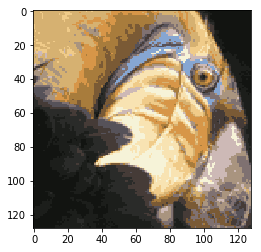

In [20]:
X_compressed*=255
plt.imshow(X_compressed)

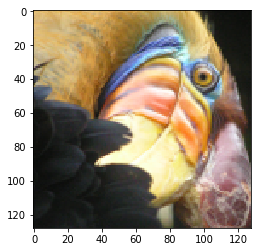

In [21]:
plt.imshow(image['A'])